In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

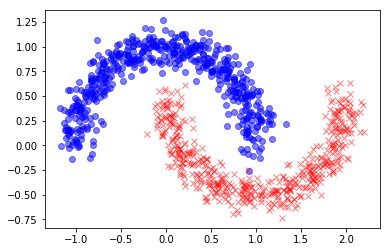

In [14]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=1000,noise=0.1,random_state=0)
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)


In [19]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
model=Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=200,verbose=0)

In [21]:
results=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 634us/step


In [26]:
results

[0.31866359094778696, 0.8466666674613953]

In [27]:
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [29]:
model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 247us/step


[0.0012668133961657683, 1.0]

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
y_train_pred=model.predict_classes(X_train)

In [32]:
y_test_pred=model.predict_classes(X_test)

# Multiclass Classification

In [3]:
df=pd.read_csv('iris.csv')

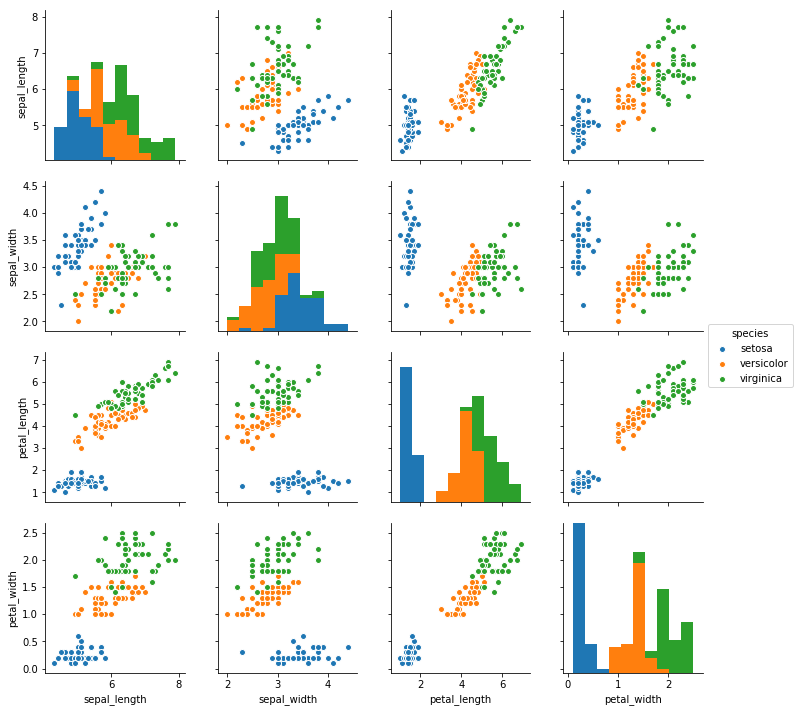

In [4]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [5]:
X=df.drop('species',axis=1)

In [6]:
target_names=df['species'].unique()

In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
target_dict={n:i for i,n in enumerate(target_names)}

In [10]:
y=df['species'].map(target_dict)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_cat=to_categorical(y)

In [18]:
y_cat[130]

array([0., 0., 1.], dtype=float32)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y_cat,test_size=0.2)

In [22]:
model=Sequential()
model.add(Dense(3,input_shape=(4,),activation='softmax'))
model.compile(Adam(lr=0.05),'categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs=20,validation_split=0.1)
y_pred=model.predict(X_test)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 1s 12ms/step - loss: 1.3051 - acc: 0.6019 - val_loss: 0.9513 - val_acc: 0.5000
Epoch 2/20
108/108 [==============================] - 0s 93us/step - loss: 0.8420 - acc: 0.6296 - val_loss: 0.9084 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s 83us/step - loss: 0.6740 - acc: 0.6852 - val_loss: 0.6899 - val_acc: 0.6667
Epoch 4/20
108/108 [==============================] - 0s 102us/step - loss: 0.6248 - acc: 0.6852 - val_loss: 0.6773 - val_acc: 0.6667
Epoch 5/20
108/108 [==============================] - 0s 111us/step - loss: 0.5677 - acc: 0.7037 - val_loss: 0.6683 - val_acc: 0.5000
Epoch 6/20
108/108 [==============================] - 0s 121us/step - loss: 0.5389 - acc: 0.7130 - val_loss: 0.6725 - val_acc: 0.5833
Epoch 7/20
108/108 [==============================] - 0s 93us/step - loss: 0.5135 - acc: 0.7500 - val_loss: 0.5692 - val_acc: 0.5000
Epoch 8/20
108/108 [=

In [25]:
y_pred[:3]

array([[2.9532393e-02, 5.6155682e-01, 4.0891072e-01],
       [9.5847613e-01, 4.1050360e-02, 4.7350704e-04],
       [9.2411709e-01, 7.4164711e-02, 1.7181830e-03]], dtype=float32)

In [26]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [31]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.75      0.86        12
          2       0.70      1.00      0.82         7

avg / total       0.93      0.90      0.90        30

